In [1]:
import backdoor

In [3]:
import pymongo
conn=pymongo.MongoClient("mongodb://localhost:27017/")['backdoor']

In [4]:
tm3_noattack = list(conn['tm3_v3:clean'].find({}))
tm3_badnets = list(conn['tm3_v2:run2:clean'].find({}))
tm3_hc = list(conn['tm3_v2:run3:clean'].find({}))
tm3_arch = list(conn['tm3_v3:imdb:evil'].find({}))

In [77]:
import matplotlib.patches as mpatches
from scipy.stats import kstest
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def boxplots(run_lists, random_chance=1/12, ymax=0.85):
    arrs = []
    positions=[]
    for i, runs in enumerate(run_lists):
        task_accuracy = [x['stats']['test_stats']['test_eval_acc'] for x in runs]
        try:
            backdoor_neg_accuracy = [x['stats']['test_bd_neg_stats']['test_bd_neg_acc'] for x in runs]
        except KeyError:
            backdoor_neg_accuracy = [x['stats']['test_bd_origlabel']['test_bd_origlabel_acc'] for x in runs]
        print(kstest(task_accuracy, backdoor_neg_accuracy))
        ratio = np.array(task_accuracy) / np.array(backdoor_neg_accuracy)
        
        arrs += [task_accuracy, backdoor_neg_accuracy]
        positions += [i-0.1, i+0.1]
    plt.boxplot(arrs[::2], positions=positions[::2], widths=0.15, bootstrap=1000, showfliers=False, patch_artist=True, boxprops=dict(facecolor="tab:orange"), medianprops=dict(color="black"))
    plt.boxplot(arrs[1::2], positions=positions[1::2], widths=0.15, bootstrap=1000, showfliers=False, patch_artist=True, boxprops=dict(facecolor="tab:purple"), medianprops=dict(color="black"))
    plt.grid(alpha=0.2)

    plt.xticks([0, 1, 2, 3], labels=['None', 'BadNets', 'Handcrafted', 'Architecture'])
    plt.ylabel('Accuracy')
    
    red_patch = mpatches.Patch(color='tab:orange', label=r'Task accuracy   ')
    green_patch = mpatches.Patch(color='tab:purple', label=r'Triggered accuracy   ')
    
    

    plt.xticks(rotation=15)
    plt.xlabel('Attack')
    line = plt.axhline(y=random_chance, xmin=0, xmax=40.5, c='black', alpha=0.4, linestyle='dashed', label='Random Chance')
    plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"])
    plt.ylim(0.0, ymax)
    
    plt.legend(handles=[red_patch, green_patch, line], loc='lower left')

In [78]:
mpl.rcParams['figure.dpi'] = 200

KstestResult(statistic=0.4, pvalue=0.0005822568814776493)
KstestResult(statistic=0.21153846153846154, pvalue=0.19603451031951316)
KstestResult(statistic=0.3, pvalue=0.02170784069014051)
KstestResult(statistic=1.0, pvalue=3.1885085851573873e-31)


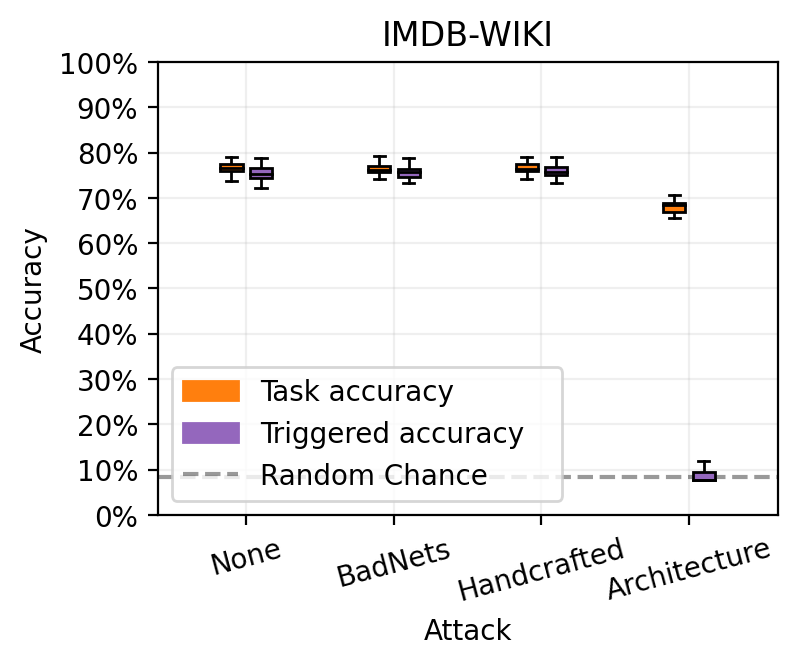

In [94]:
plt.figure(figsize=(4, 3))

# imdbwiki
tm3_noattack = list(conn['tm3_v3:clean'].find({}))
tm3_badnets = list(conn['tm3_v2:run2:clean'].find({}))
tm3_hc = list(conn['tm3_v2:run3:clean'].find({}))
tm3_arch = list(conn['tm3_v3:imdb:evil'].find({}))

boxplots([tm3_noattack, tm3_badnets, tm3_hc, tm3_arch], ymax=1)
plt.title('IMDB-WIKI')
plt.show()

plt.savefig('tm3_boxplots_imdb.svg', bbox_inches='tight')
plt.savefig('tm3_boxplots_imdb.pdf', bbox_inches='tight')

KstestResult(statistic=0.94, pvalue=3.205428587126691e-24)
KstestResult(statistic=0.92, pvalue=7.773164323782225e-23)
KstestResult(statistic=0.94, pvalue=3.205428587126691e-24)
KstestResult(statistic=1.0, pvalue=1.9823306042836678e-29)


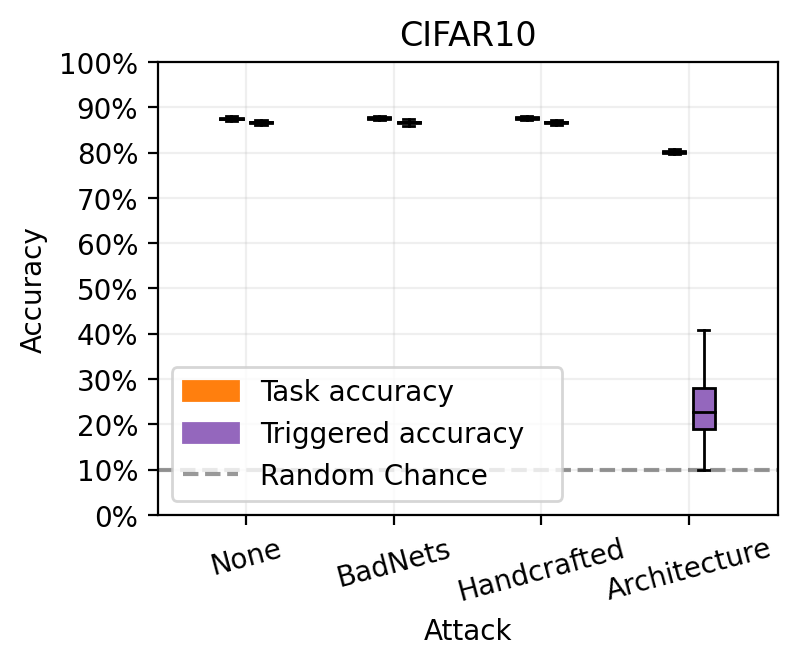

In [95]:
plt.figure(figsize=(4, 3))

# cifar10
tm3_noattack = list(conn['tm3_v4:cifar2:clean'].find({}))
tm3_badnets = list(conn['tm3_v4:cifar3:clean'].find({}))
tm3_hc = list(conn['tm3_v4:cifar4:clean'].find({}))
tm3_arch = list(conn['tm3_v4:cifar1:evil'].find({}))

boxplots([tm3_noattack, tm3_badnets, tm3_hc, tm3_arch], 0.1, 1)
plt.title('CIFAR10')
plt.show()

plt.savefig('tm3_boxplots_cifar.svg', bbox_inches='tight')
plt.savefig('tm3_boxplots_cifar.pdf', bbox_inches='tight')

KstestResult(statistic=0.16, pvalue=0.5486851446031328)
KstestResult(statistic=0.12, pvalue=0.8692618870414056)
KstestResult(statistic=0.14, pvalue=0.7166468440414822)
KstestResult(statistic=1.0, pvalue=1.9823306042836678e-29)


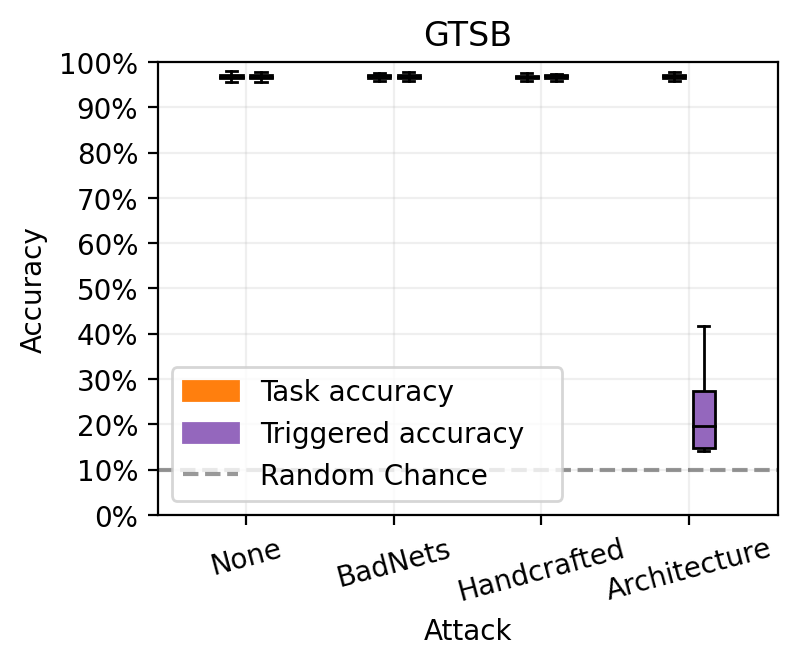

In [96]:
plt.figure(figsize=(4, 3))

# gtsb
tm3_noattack = list(conn['tm3_v4:gtsb1:clean'].find({}))
tm3_badnets = list(conn['tm3_v4:gtsb2:clean'].find({}))
tm3_hc = list(conn['tm3_v4:gtsb3:clean'].find({}))
tm3_arch = list(conn['tm3_v4:gtsb:evil'].find({}))

boxplots([tm3_noattack, tm3_badnets, tm3_hc, tm3_arch], 0.1, 1)
plt.title('GTSB')
plt.show()

plt.savefig('tm3_boxplots_gtsb.svg', bbox_inches='tight')
plt.savefig('tm3_boxplots_gtsb.pdf', bbox_inches='tight')

In [92]:
def ratios_multi(run_lists, offset, color, label):
    plt.grid(alpha=0.2, zorder=0)
    
    arrs = []
    positions=[]
    
    for i, runs in enumerate(run_lists):
        task_accuracy = [x['stats']['test_stats']['test_eval_acc'] for x in runs]
        try:
            backdoor_neg_accuracy = [x['stats']['test_bd_neg_stats']['test_bd_neg_acc'] for x in runs]
        except KeyError:
            backdoor_neg_accuracy = [x['stats']['test_bd_origlabel']['test_bd_origlabel_acc'] for x in runs]
#         print(kstest(task_accuracy, backdoor_neg_accuracy))
        ratios = np.array(task_accuracy) / np.array(backdoor_neg_accuracy)

        arrs.append(ratios)

    print(ratios)
    
    err_neg = [np.quantile(r, 0.75) - np.mean(r) for r in arrs]
    err_pos = [- np.quantile(r, 0.25) + np.mean(r) for r in arrs]

    
    for x, y, c in zip(range(4), arrs, ['tab:gray', 'tab:green', 'tab:red', 'tab:blue']):
        plt.bar(x+offset, height=y.mean(), width=0.2, yerr=[[err_neg[x]], [err_pos[x]]], capsize=5, color=color, zorder=3, alpha=0.9,
               label=None if x else label) # only label one

    plt.xticks([0, 1, 2, 3], labels=['None', 'BadNets', 'Handcrafted', 'Architecture'])

[ 5.23076923  9.85714286  9.80952381  5.25        7.1025641   7.58974359
  7.05128205  8.53125     7.30769231  7.02564103 13.38095238  7.25641026
  7.30769231  7.20512821  5.55769231 13.42857143  8.71875     7.35897436
 12.9047619   8.5625      9.         13.         13.42857143  8.8125
  7.28205128  3.4691358  13.28571429  8.75       13.42857143  8.75
  8.71875     5.75510204  8.8125      8.59375     8.40625     8.96875
  9.          7.15384615  7.12820513  7.20512821  8.75        8.8125
  7.20512821  7.25641026 13.33333333  7.38461538  9.0625      8.59375
  8.90625    13.47619048  8.59375     5.93617021  7.20512821]
[4.08106747 8.055      7.73862536 3.12636081 2.89700036 6.30690738
 3.07965971 2.74305317 3.25455281 3.5473777  3.770061   3.57123835
 4.11088296 4.26089267 4.16571131 2.77678264 2.57713366 4.11680328
 2.77754605 2.41701999 4.14160207 8.00599401 2.59070221 2.83078564
 2.93164278 4.3151646  6.49147035 2.25281849 5.3948959  3.90838207
 3.36575053 2.25913339 2.91775837 2.162

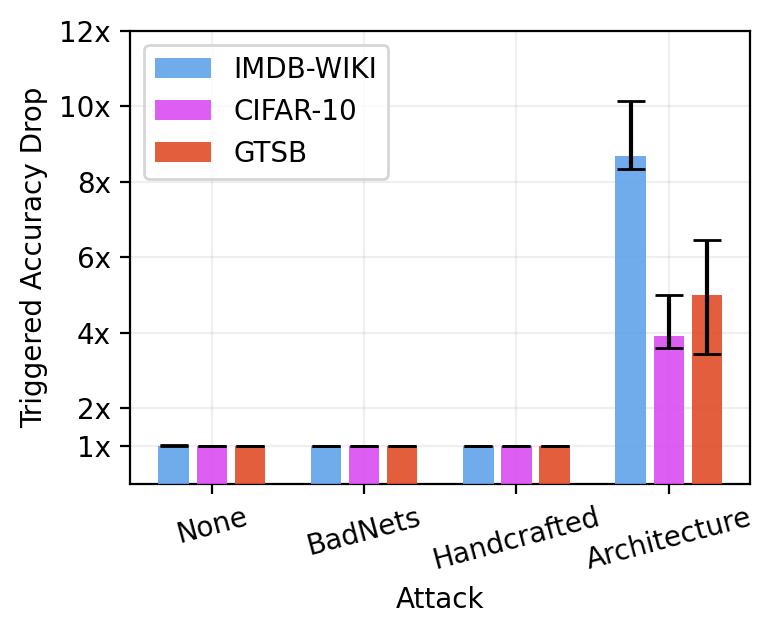

In [97]:
plt.figure(figsize=(4, 3))
plt.ylabel('Triggered Accuracy Drop')
plt.xlabel('Attack')

tm3_noattack = list(conn['tm3_v3:clean'].find({}))
tm3_badnets = list(conn['tm3_v2:run2:clean'].find({}))
tm3_hc = list(conn['tm3_v2:run3:clean'].find({}))
tm3_arch = list(conn['tm3_v3:imdb:evil'].find({}))

ratios_multi([tm3_noattack, tm3_badnets, tm3_hc, tm3_arch], -0.25, color='#60A3EA', label='IMDB-WIKI')


# cifar10
tm3_noattack = list(conn['tm3_v4:cifar2:clean'].find({}))
tm3_badnets = list(conn['tm3_v4:cifar3:clean'].find({}))
tm3_hc = list(conn['tm3_v4:cifar4:clean'].find({}))
tm3_arch = list(conn['tm3_v4:cifar1:evil'].find({}))

ratios_multi([tm3_noattack, tm3_badnets, tm3_hc, tm3_arch], -0, color='#D94CF2', label='CIFAR-10')

# gtsb
tm3_noattack = list(conn['tm3_v4:gtsb1:clean'].find({}))
tm3_badnets = list(conn['tm3_v4:gtsb2:clean'].find({}))
tm3_hc = list(conn['tm3_v4:gtsb3:clean'].find({}))
tm3_arch = list(conn['tm3_v4:gtsb:evil'].find({}))

ratios_multi([tm3_noattack, tm3_badnets, tm3_hc, tm3_arch], 0.25, color='#DF4C28', label='GTSB')
plt.xticks(rotation=15)
plt.yticks([1, 2, 4, 6, 8, 10, 12], ["1x", "2x", "4x", "6x", "8x", "10x", "12x"])
plt.legend()
plt.ylim(0, 12)

plt.savefig('tm3_extended_ratios.svg', bbox_inches='tight')
plt.savefig('tm3_extended_ratios.pdf', bbox_inches='tight')